In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# smote_path = './data/SMOTE/'
smote_path = './data/newdata/'

x_train_path = os.path.join(smote_path, 'x_train_new.csv')
y_train_path = os.path.join(smote_path, 'y_train_new.csv')
x_test_path = os.path.join(smote_path, 'x_test_new.csv')
y_test_path = os.path.join(smote_path, 'y_test_new.csv')

X_train = pd.read_csv(x_train_path).iloc[:, 1:]
y_train = pd.read_csv(y_train_path).iloc[:, -1]
X_test = pd.read_csv(x_test_path).iloc[:, 1:]
y_test = pd.read_csv(y_test_path).iloc[:, -1]

In [3]:
X_train.head()

,review_stars_median,review_stars_std,weighted_useful_stars,weighted_funny_stars,weighted_cool_stars,tip_cnt,review_count,restaurants_take_out,business_parking,categories
0,1.0,1.127063,1.334630,1.553191,2.191489,2.0,125.0,1.0,1.0,American
1,2.0,1.578261,3.904762,4.195122,2.322581,0.0,61.0,1.0,1.0,Chinese
2,5.0,0.965532,4.419417,4.027907,4.376471,0.0,683.0,1.0,1.0,Italian
3,3.5,1.211060,3.125000,3.333333,3.750000,0.0,60.0,1.0,1.0,Canadian
4,4.0,1.477790,4.250000,3.937500,3.661765,1.0,187.0,1.0,1.0,American


In [4]:
y_train.head()

0    0
1    1
2    1
3    1
4    1
Name: stars, dtype: int64

In [5]:
X_test.head()

,review_stars_median,review_stars_std,weighted_useful_stars,weighted_funny_stars,weighted_cool_stars,tip_cnt,categories,review_count,restaurants_take_out,business_parking
0,4.0,1.342077,2.949153,3.368421,3.368421,1.0,Japanese,223.0,1.0,1.0
1,4.0,1.928673,1.490385,1.484375,2.291667,0.0,Italian,244.0,1.0,1.0
2,4.5,1.880925,3.257937,2.068627,3.492424,0.0,Chinese,136.0,1.0,1.0
3,4.0,1.398051,3.183673,2.842105,3.538462,4.0,Indian,415.0,1.0,1.0
4,1.0,1.388730,1.085308,1.162162,1.439024,1.0,Italian,125.0,1.0,1.0


In [6]:
y_test.head()

0    1
1    1
2    1
3    1
4    0
Name: 0, dtype: int64

In [7]:
cate_types = list(X_test['categories'].unique())
cate_types_train = list(X_train['categories'].unique())

assert sorted(cate_types) == sorted(cate_types_train)

print(f'Categories: {cate_types}\n')
print(f'Number of categories: {len(cate_types)}')

Categories: ['Japanese', 'Italian', 'Chinese', 'Indian', 'Korean', 'American', 'Vietnamese', 'Canadian', 'Greek', 'Mexican', 'Thai', 'Pakistani', 'French', 'Spanish']

Number of categories: 14


In [8]:
def make_grid_search(clf, parameters, X_train, y_train):
    grid_clf = GridSearchCV(clf, parameters)
    grid_clf.fit(X_train.drop(columns=['categories']), y_train)
    print(grid_clf.best_params_)
    return grid_clf.best_estimator_


def print_sum_info(clf, cate_types, X_test, y_test):
#     clf = grid_clf.best_estimator_
    total_score = clf.score(X_test.drop(columns=['categories']), y_test)
    print(f'Total score: {total_score}\n')
    for cate in sorted(cate_types):
        score = clf.score(
            X_test[X_test['categories']==cate].drop(columns=['categories']), y_test[X_test['categories']==cate])
        print(f'{cate}: {score}')      

In [9]:
# svm_clf = SVC(gamma='auto', decision_function_shape='ovr').fit(X_train.drop(columns=['categories']), y_train)
# svm_clf.score(X_test.drop(columns=['categories']), y_test)

# for cate in sorted(cate_types):
#     score = svm_clf.score(X_test[X_test['categories']==cate].drop(columns=['categories']), 
#                              y_test[X_test['categories']==cate])
#     print(f'\'{cate}\': {score}')

In [ ]:
# Best 100.
# svc_params = {'C':[1e-1, 1, 10, 100]}
svc_params = {'C':[80, 100, 120, 200]}
svc_clf = make_grid_search(
    clf=SVC(decision_function_shape='ovr'), parameters=svc_params, X_train=X_train, y_train=y_train)

print_sum_info(clf=svc_clf, cate_types=cate_types, X_test=X_test, y_test=y_test)

In [ ]:
# print_score(cate_types=cate_types, cls=svm_clf, X_test=X_test, y_test=y_test)

In [ ]:
# forest_clf = RandomForestClassifier(max_depth=100, oob_score=True)
# forest_clf.fit(X_train.drop(columns=['categories']), y_train)

In [15]:
# forest_params = {'min_samples_split': range(2, 8, 2), 'min_samples_leaf': range(2, 8, 2)}
forest_params = {'min_samples_split': [2], 'min_samples_leaf': [2]}

forest_clf = make_grid_search(
    clf=RandomForestClassifier(oob_score=True), parameters=forest_params, X_train=X_train, y_train=y_train)


print_sum_info(clf=forest_clf, cate_types=cate_types, X_test=X_test, y_test=y_test)

{'min_samples_leaf': 2, 'min_samples_split': 2}
Total score: 0.8121250394695295

American: 0.8172348484848485
Canadian: 0.9072164948453608
Chinese: 0.8275434243176178
French: 0.8490566037735849
Greek: 0.7913669064748201
Indian: 0.8219895287958116
Italian: 0.7991803278688525
Japanese: 0.842756183745583
Korean: 0.9047619047619048
Mexican: 0.7299528301886793
Pakistani: 0.859375
Spanish: 0.7169811320754716
Thai: 0.8616600790513834
Vietnamese: 0.8227272727272728


In [ ]:
# forest_clf.score(X_test.drop(columns=['categories']), y_test)
# for cate in sorted(cate_types):
#     score = forest_clf.score(X_test[X_test['categories']==cate].drop(columns=['categories']), 
#                              y_test[X_test['categories']==cate])
#     print(f'{cate} : {score}')

In [ ]:
# gnb_clf = GaussianNB().fit(X_train.drop(columns=['categories']), y_train)
# gnb_clf.score(X_test.drop(columns=['categories']), y_test)
# for cate in sorted(cate_types):
#     score = gnb_clf.score(X_test[X_test['categories']==cate].drop(columns=['categories']), 
#                              y_test[X_test['categories']==cate])
#     print(f'{cate} : {score}')

In [ ]:
# mnb_clf = MultinomialNB().fit(X_train.drop(columns=['categories']), y_train)
# mnb_clf.score(X_test.drop(columns=['categories']), y_test)
# for cate in sorted(cate_types):
#     score = mnb_clf.score(X_test[X_test['categories']==cate].drop(columns=['categories']), 
#                              y_test[X_test['categories']==cate])
#     print(f'{cate} : {score}')

In [16]:
def stat_parity(preds, sens):
    """
    Only concentrate on outcomes equal to 2 (high rating)
    """
    stat_dict = {}
    for cate in np.unique(sens):
        cate_preds = preds[sens==cate]
        non_cate_preds = preds[sens!=cate]
        cate_preds2_rate = cate_preds[cate_preds==2].size / cate_preds.size
        non_cate_preds2_rate = non_cate_preds[non_cate_preds==2].size / non_cate_preds.size
        stat_dict[cate] = cate_preds2_rate - non_cate_preds2_rate
    return stat_dict


def cal_stat_parity(cls, X_test):
    return stat_parity(cls.predict(X_test.drop(columns=['categories'])), X_test['categories'].to_numpy())

In [17]:
def eq_oppo(preds, sens, labels):
    eq_dict = {}
    for cate in np.unique(sens):
        true2_preds = preds[labels==2]
        true2_sens = sens[labels==2]
        cate_true2_preds = true2_preds[true2_sens==cate]
        non_cate_true2_preds = true2_preds[true2_sens!=cate]
        cate_true2_preds2_rate = cate_true2_preds[cate_true2_preds==2].size / cate_true2_preds.size
        non_cate_true2_preds2_rate = non_cate_true2_preds[non_cate_true2_preds==2].size / non_cate_true2_preds.size
        eq_dict[cate] = cate_true2_preds2_rate - non_cate_true2_preds2_rate
    return eq_dict


def cal_eq_oppo(cls, y_test, X_test):
    return eq_oppo(cls.predict(X_test.drop(columns=['categories'])), X_test['categories'].to_numpy(), y_test.to_numpy())

In [18]:
eq_dict = cal_eq_oppo(forest_clf, y_test, X_test)
eq_lst = []
for key, val in eq_dict.items():
    eq_lst.append(val)
    print(key, val)

American -0.08075648521434453
Canadian 0.30597302504816953
Chinese 0.3076964594127806
French 0.18503159557661925
Greek -0.08358253588516745
Indian -0.007168458781361964
Italian -0.06708765112262521
Japanese -0.050969242698371664
Korean 0.3612750885478158
Mexican -0.13148022876821847
Pakistani 0.13921113689095127
Spanish -0.11384976525821594
Thai 0.08992665923756704
Vietnamese 0.010880902043692742


In [19]:
stat_dict = cal_stat_parity(forest_clf, X_test)
stat_lst = []
for key, val in stat_dict.items():
    stat_lst.append(val)
    print(key, val)

American -0.02891913569613712
Canadian -0.047683511601037384
Chinese 0.029195379803427984
French 0.09438506561966044
Greek 0.011824341979201139
Indian 0.022099814797926887
Italian -0.008437657901256973
Japanese -0.0043569247658581806
Korean 0.06314534865182538
Mexican -0.000409704978022965
Pakistani -0.02090809409888357
Spanish 0.04602079346817145
Thai 0.020191187090224008
Vietnamese 0.010049959853688992


In [22]:
score_lst = []
for cate in sorted(cate_types):
    score = forest_clf.score(X_test[X_test['categories']==cate].drop(columns=['categories']), 
                             y_test[X_test['categories']==cate])
    score_lst.append(score)
    print(f'{cate} : {score}')

American : 0.8172348484848485
Canadian : 0.9072164948453608
Chinese : 0.8275434243176178
French : 0.8490566037735849
Greek : 0.7913669064748201
Indian : 0.8219895287958116
Italian : 0.7991803278688525
Japanese : 0.842756183745583
Korean : 0.9047619047619048
Mexican : 0.7299528301886793
Pakistani : 0.859375
Spanish : 0.7169811320754716
Thai : 0.8616600790513834
Vietnamese : 0.8227272727272728


In [ ]:
fig, ax = plt.subplots()
ax.set_title("Fairness metrics for RandomForestClassifier")
# ax.bar(cate_types, stat_lst, color="red", marker="o")
# ax.bar(cate_types, stat_lst, color='red')
# ax.bar(cate_types, eq_lst, color='blue')
width=0.4
df1 = pd.DataFrame(stat_lst, index=cate_types)
df2 = pd.DataFrame(eq_lst, index=cate_types)

# ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Statistical parity", color="green", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.set_ylabel("Equalized opportunity",color="blue",fontsize=14)

df1.plot(kind='bar', color='green', ax=ax, width=width, position=1, legend=False)
df2.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, legend=False)
# ax2.bar(eq_lst, color="blue", marker="o")

# plt.savefig("fairness.png")
plt.show()

In [ ]:
fig, ax = plt.subplots()
# ax.set_title("Score vs. Statistical parity for RandomForestClassifier")
# ax.bar(cate_types, stat_lst, color="red", marker="o")
# ax.bar(cate_types, stat_lst, color='red')
# ax.bar(cate_types, eq_lst, color='blue')
width=0.4
df1 = pd.DataFrame(score_lst, index=cate_types)
df2 = pd.DataFrame(stat_lst, index=cate_types)

# ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Score", color="C6", fontsize=14)
ax2=ax.twinx()
ax2.set_ylabel("Statistical parity",color="green",fontsize=14)

# twin object for two different y-axis on the sample plot

df1.plot(kind='bar', color='C6', ax=ax, ylim=[0.7, 0.95], width=width, position=1, legend=False)
df2.plot(kind='bar', color='green', ax=ax2, width=width, position=0, legend=False)

# ax2.bar(eq_lst, color="blue", marker="o")

# plt.savefig("fairness.png")
plt.show()

In [ ]:
fig, ax = plt.subplots()
# ax.set_title("Score vs. Statistical parity for RandomForestClassifier")
# ax.bar(cate_types, stat_lst, color="red", marker="o")
# ax.bar(cate_types, stat_lst, color='red')
# ax.bar(cate_types, eq_lst, color='blue')
width=0.4
df1 = pd.DataFrame(score_lst, index=cate_types)
df2 = pd.DataFrame(eq_lst, index=cate_types)

# ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Score", color="C6", fontsize=14)
ax2=ax.twinx()
ax2.set_ylabel("Equalized opportunity",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot

df1.plot(kind='bar', color='C6', ax=ax, ylim=[0.7, 0.95], width=width, position=1, legend=False)
df2.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, legend=False)

# ax2.bar(eq_lst, color="blue", marker="o")

# plt.savefig("fairness.png")
plt.show()

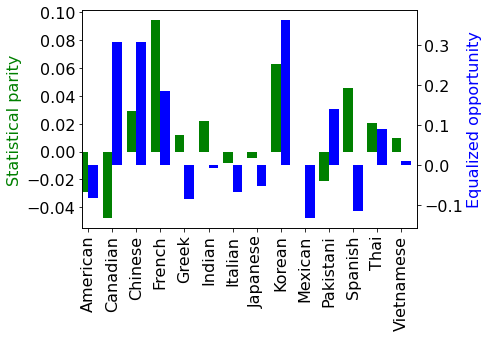

In [43]:
fig, ax = plt.subplots()
# ax.set_title("Fairness metrics for RandomForestClassifier")
# ax.bar(cate_types, stat_lst, color="red", marker="o")
# ax.bar(cate_types, stat_lst, color='red')
# ax.bar(cate_types, eq_lst, color='blue')
width=0.4
df1 = pd.DataFrame(stat_lst, index=sorted(cate_types))
df2 = pd.DataFrame(eq_lst, index=sorted(cate_types))

# ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Statistical parity", color="green", fontsize=16)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.set_ylabel("Equalized opportunity",color="blue",fontsize=16)

df1.plot(kind='bar', color='green', ax=ax, width=width, position=1, legend=False, fontsize=16)
df2.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, legend=False, fontsize=16)
# ax2.bar(eq_lst, color="blue", marker="o")

plt.savefig("s_vs_e.svg", facecolor='w')
plt.show()

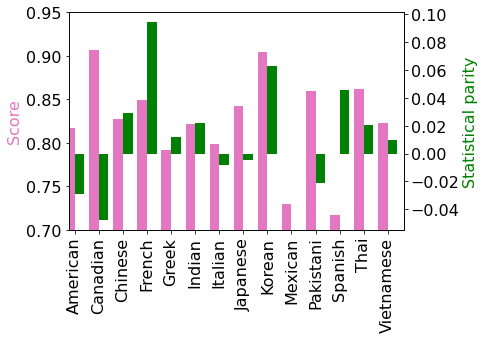

In [44]:
fig, ax = plt.subplots()
# ax.set_title("Score vs. Statistical parity for RandomForestClassifier")
# ax.bar(cate_types, stat_lst, color="red", marker="o")
# ax.bar(cate_types, stat_lst, color='red')
# ax.bar(cate_types, eq_lst, color='blue')
width=0.4
df1 = pd.DataFrame(score_lst, index=sorted(cate_types))
df2 = pd.DataFrame(stat_lst, index=sorted(cate_types))

# ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Score", color="C6", fontsize=16)
ax2=ax.twinx()
ax2.set_ylabel("Statistical parity",color="green",fontsize=16)

# twin object for two different y-axis on the sample plot

df1.plot(kind='bar', color='C6', ax=ax, ylim=[0.7, 0.95], width=width, position=1, legend=False, fontsize=16)
df2.plot(kind='bar', color='green', ax=ax2, width=width, position=0, legend=False, fontsize=16)

# ax2.bar(eq_lst, color="blue", marker="o")

plt.savefig("acc_vs_s.svg", facecolor='w')
plt.show()

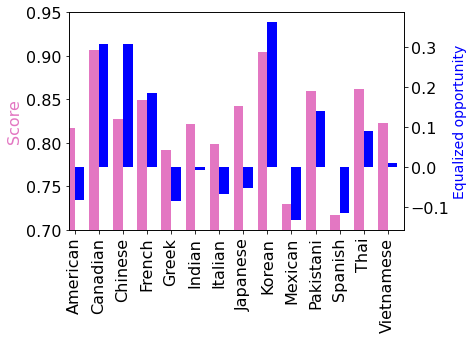

In [45]:
fig, ax = plt.subplots()
# ax.set_title("Score vs. Statistical parity for RandomForestClassifier")
# ax.bar(cate_types, stat_lst, color="red", marker="o")
# ax.bar(cate_types, stat_lst, color='red')
# ax.bar(cate_types, eq_lst, color='blue')
width=0.4
df1 = pd.DataFrame(score_lst, index=sorted(cate_types))
df2 = pd.DataFrame(eq_lst, index=sorted(cate_types))

# ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Score", color="C6", fontsize=16)
ax2=ax.twinx()
ax2.set_ylabel("Equalized opportunity",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot

df1.plot(kind='bar', color='C6', ax=ax, ylim=[0.7, 0.95], width=width, position=1, legend=False, fontsize=16)
df2.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, legend=False, fontsize=16)

# ax2.bar(eq_lst, color="blue", marker="o")

# plt.savefig("fairness.png")
plt.savefig("acc_vs_e.svg", facecolor='w')
plt.show()